In [102]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import PolynomialFeatures

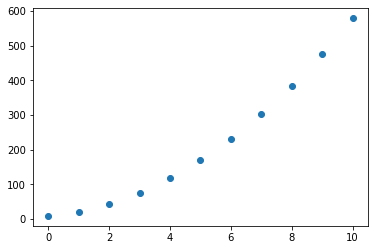

In [38]:
def generate_data():
    #X = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  
    #y = np.array([5*i**2 + 7*i + 9 for i in X])
    X = np.arange(-30, 30, 1)
    y = 9*X**3 + 5*X**2 + np.random.randn(60)*1000
    return X, y
trX, trY = generate_data()
#trX = trX/max(trX)
#trY = trY/max(trY)
#plot the data
fig, ax = plt.subplots()
ax.scatter(trX, trY)

In [87]:
n = 2
trX_expanded = np.expand_dims(trX, axis=1)
poly = PolynomialFeatures(n)# returns: [1, x, x^2, x^3]
trX_expanded = poly.fit_transform(trX_expanded)

In [99]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [98]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [103]:
inp = Input((n+1)) 
hid = Dense(468, activation='relu')(inp)
hid = Dense(468, activation='relu')(hid)
#since one of the features is 1, we need an extra input
out = Dense(1)(hid)
model = Model(inputs=inp, outputs=out)
model.compile(optimizer=Adam(lr=1e-3), loss="mean_squared_error")
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [104]:
model.fit(trX_expanded, trY, epochs=500, callbacks=[tensorboard_callback])


Epoch 1/500
1/1 [==============================] - 1s 803ms/step - loss: 82295.5938
Epoch 2/500
1/1 [==============================] - 0s 85ms/step - loss: 77246.4766
Epoch 3/500
1/1 [==============================] - 0s 73ms/step - loss: 72609.2500
Epoch 4/500
1/1 [==============================] - 0s 74ms/step - loss: 68186.1484
Epoch 5/500
1/1 [==============================] - 0s 82ms/step - loss: 64033.9414
Epoch 6/500
1/1 [==============================] - 0s 78ms/step - loss: 60166.5000
Epoch 7/500
1/1 [==============================] - 0s 86ms/step - loss: 56289.5352
Epoch 8/500
1/1 [==============================] - 0s 82ms/step - loss: 52383.5664
Epoch 9/500
1/1 [==============================] - 0s 77ms/step - loss: 48386.6602
Epoch 10/500
1/1 [==============================] - 0s 80ms/step - loss: 44316.0625
Epoch 11/500
1/1 [==============================] - 0s 73ms/step - loss: 40173.3164
Epoch 12/500
1/1 [==============================] - 0s 76ms/step - loss: 35986.7773


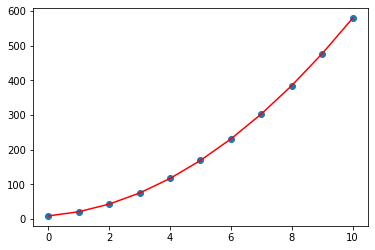

In [105]:
plt.scatter(trX, trY)
plt.plot(trX, model.predict(trX_expanded), color="red")
plt.show()

In [106]:
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>

In [91]:
test_x = np.array([0, 1, 2, 9])
test_y = np.array([9, 21, 43, 477])

#test_x = test_x/max(test_x)
#test_y = test_y/max(test_y)


In [92]:
test_x

array([0, 1, 2, 9])

In [93]:
test_x_expand = np.expand_dims(test_x, axis=1)
test_x_expand

array([[0],
       [1],
       [2],
       [9]])

In [94]:

test_x_expand = poly.fit_transform(test_x_expand)
test_x_expand

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  9., 81.]])

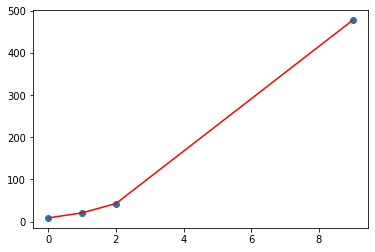

In [95]:
plt.scatter(test_x, test_y)
plt.plot(test_x, model.predict(test_x_expand), color="red")
plt.show()

In [96]:
model.predict(test_x_expand)

array([[  8.999594],
       [ 21.000248],
       [ 42.99993 ],
       [476.96503 ]], dtype=float32)